## Import required Libraries

https://www.kaggle.com/code/rakibhossainsajib/crop-recommendation-using-machine-learning

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load the dataset

In [128]:
df = pd.read_csv("Crop_recommendation.csv")

In [129]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [131]:
df.shape

(2200, 8)

In [132]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Check for null values

In [133]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Check for duplicates

In [134]:
df.duplicated().sum()

0

## Check the unique values of Target variable

In [135]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [136]:
## Unique/distinct target variable
len(df['label'].value_counts())

22

## Encoding

In [137]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [138]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [139]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [140]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [141]:
df['label'].nunique()

22

## Correlation Matrix

In [142]:
num_featrures = df.select_dtypes(include='number')
corr = num_featrures.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


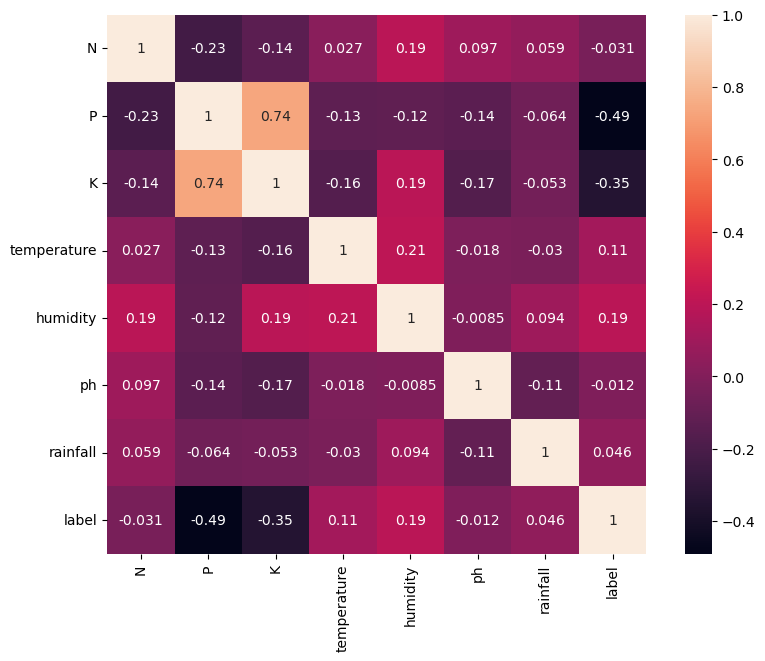

In [143]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, square=True)
plt.show()

## Distribution Plot

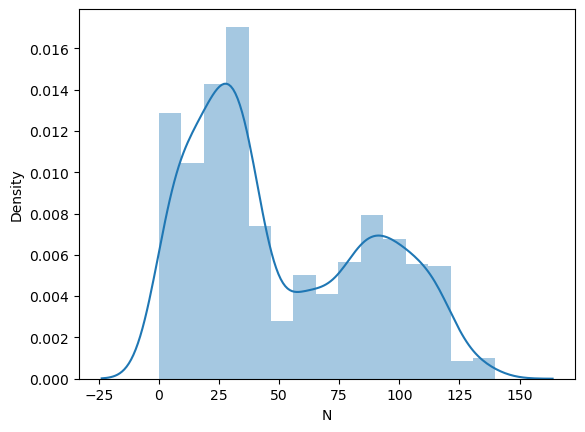

In [144]:
sns.distplot(df['N'])
plt.show()

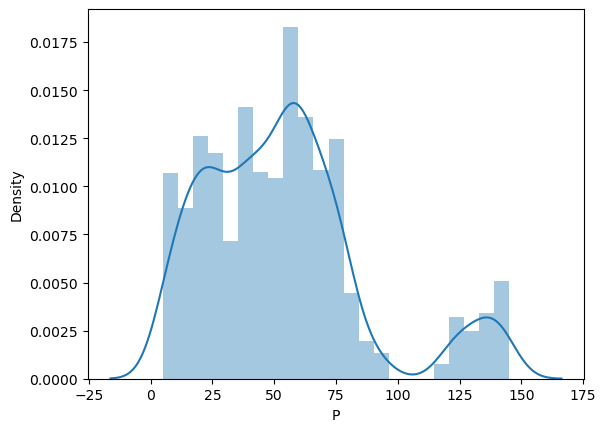

In [145]:
sns.distplot(df['P'])
plt.show()

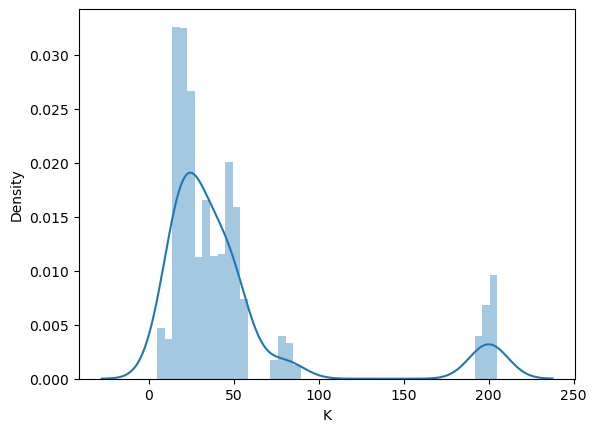

In [146]:
sns.distplot(df['K'])
plt.show()

## Train test split

In [147]:
X = df.drop('label', axis=1)
y= df['label']

In [148]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
X_train.shape, X_test.shape

((1760, 7), (440, 7))

## Scaling: Normalization

In [151]:
## initialize scaler
scaler = MinMaxScaler()

## Fit-transform the training data
X_train = scaler.fit_transform(X_train)

## Transform only on the testing data
X_test = scaler.transform(X_test)

In [152]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [153]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

LogisticRegression mode with accuracy: 0.9205
Confusion Matrix:


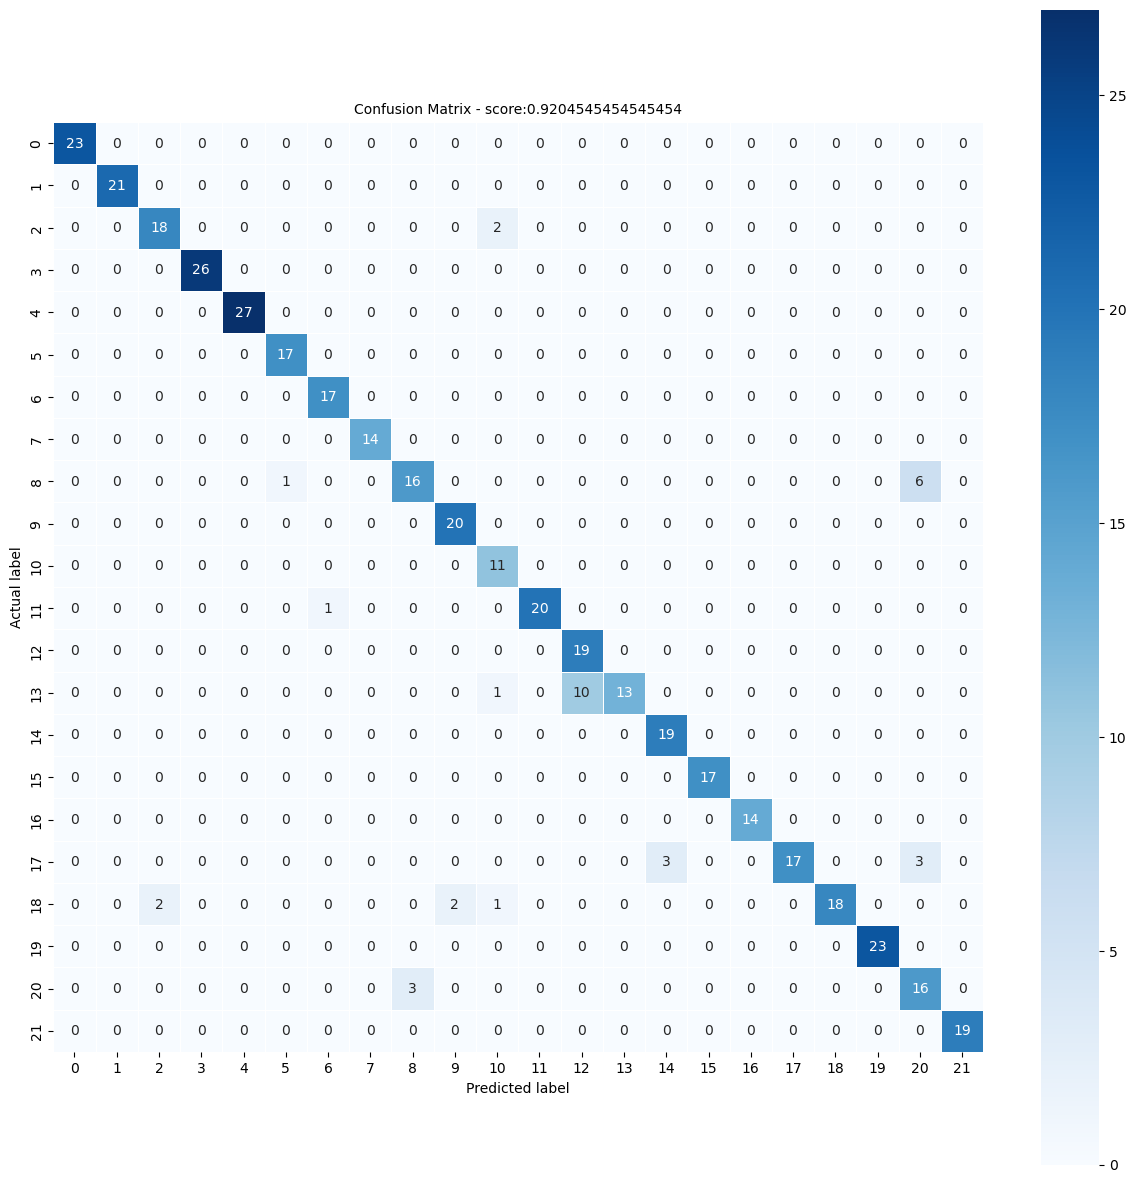

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.90      0.90        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.84      0.70      0.76        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.66      1.00      0.79        19
          13       1.00      0.54      0.70        24
          14       0.86      1.00      0.93        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

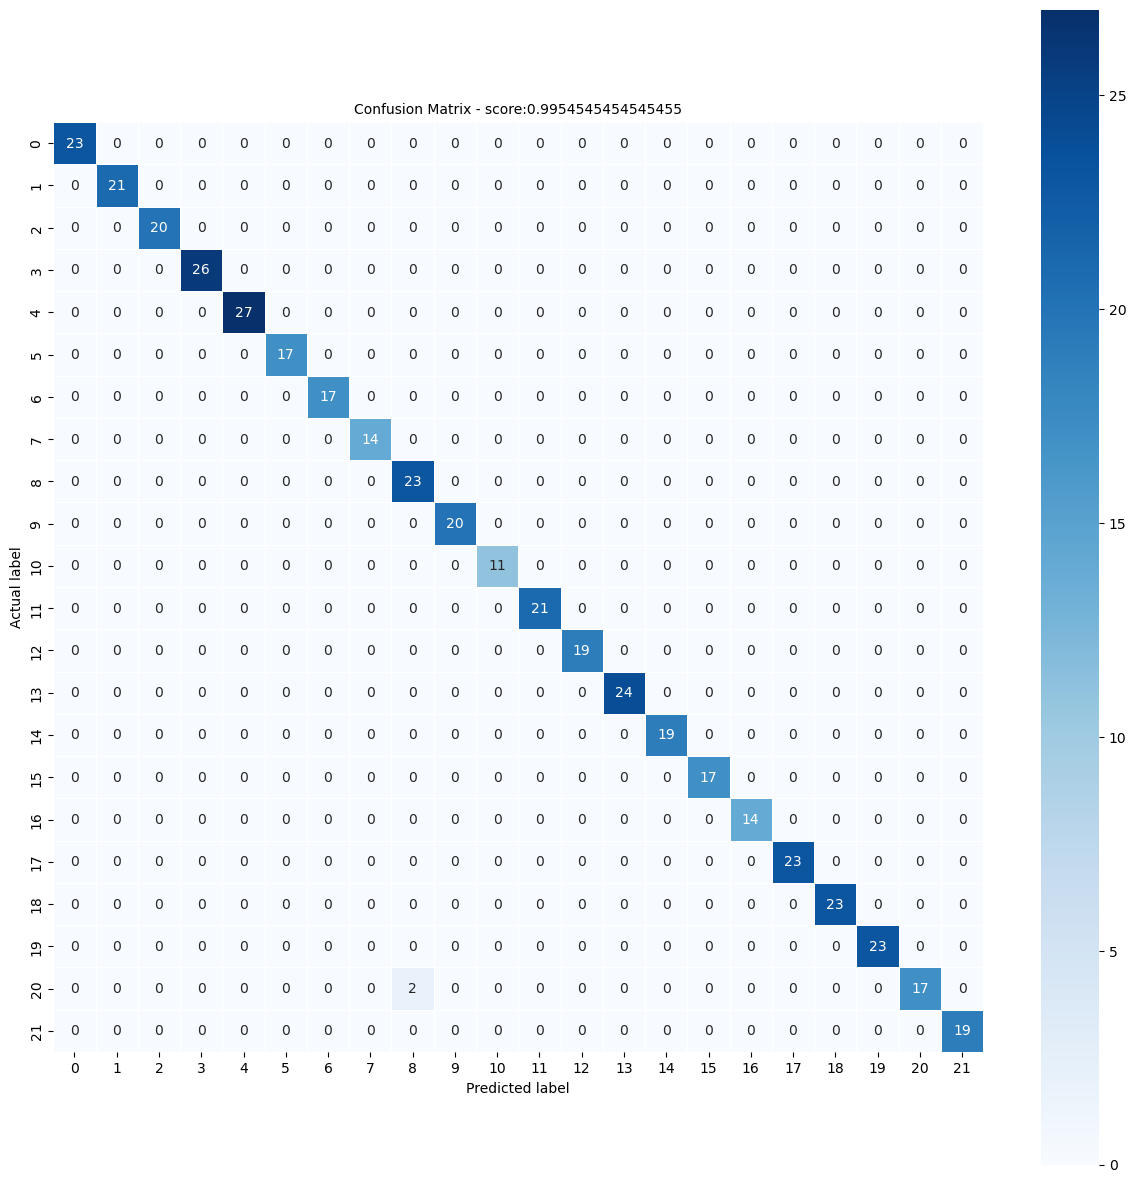

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

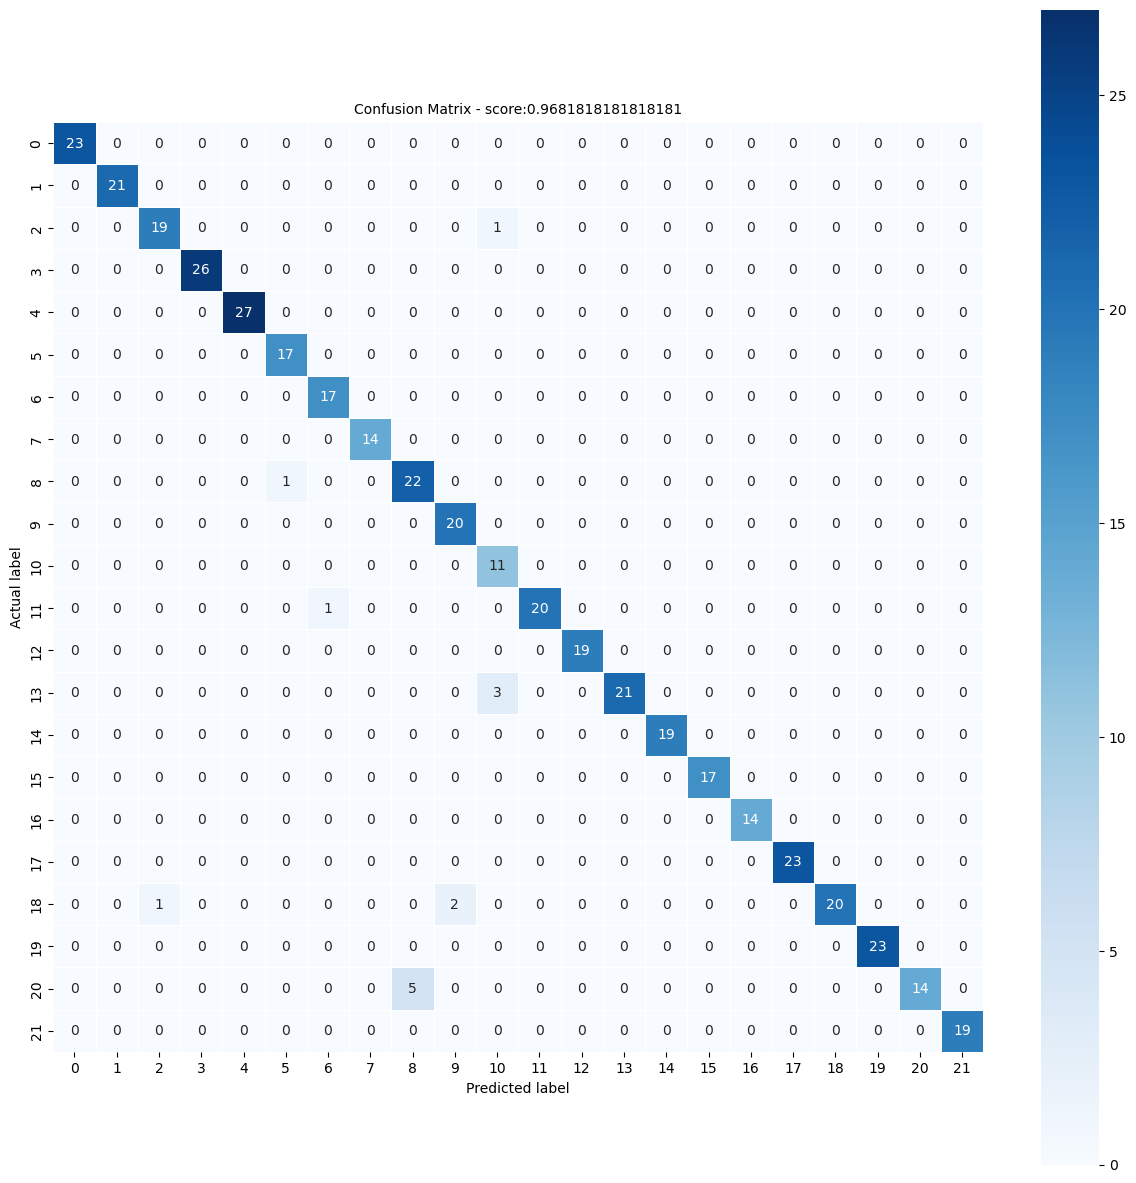

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

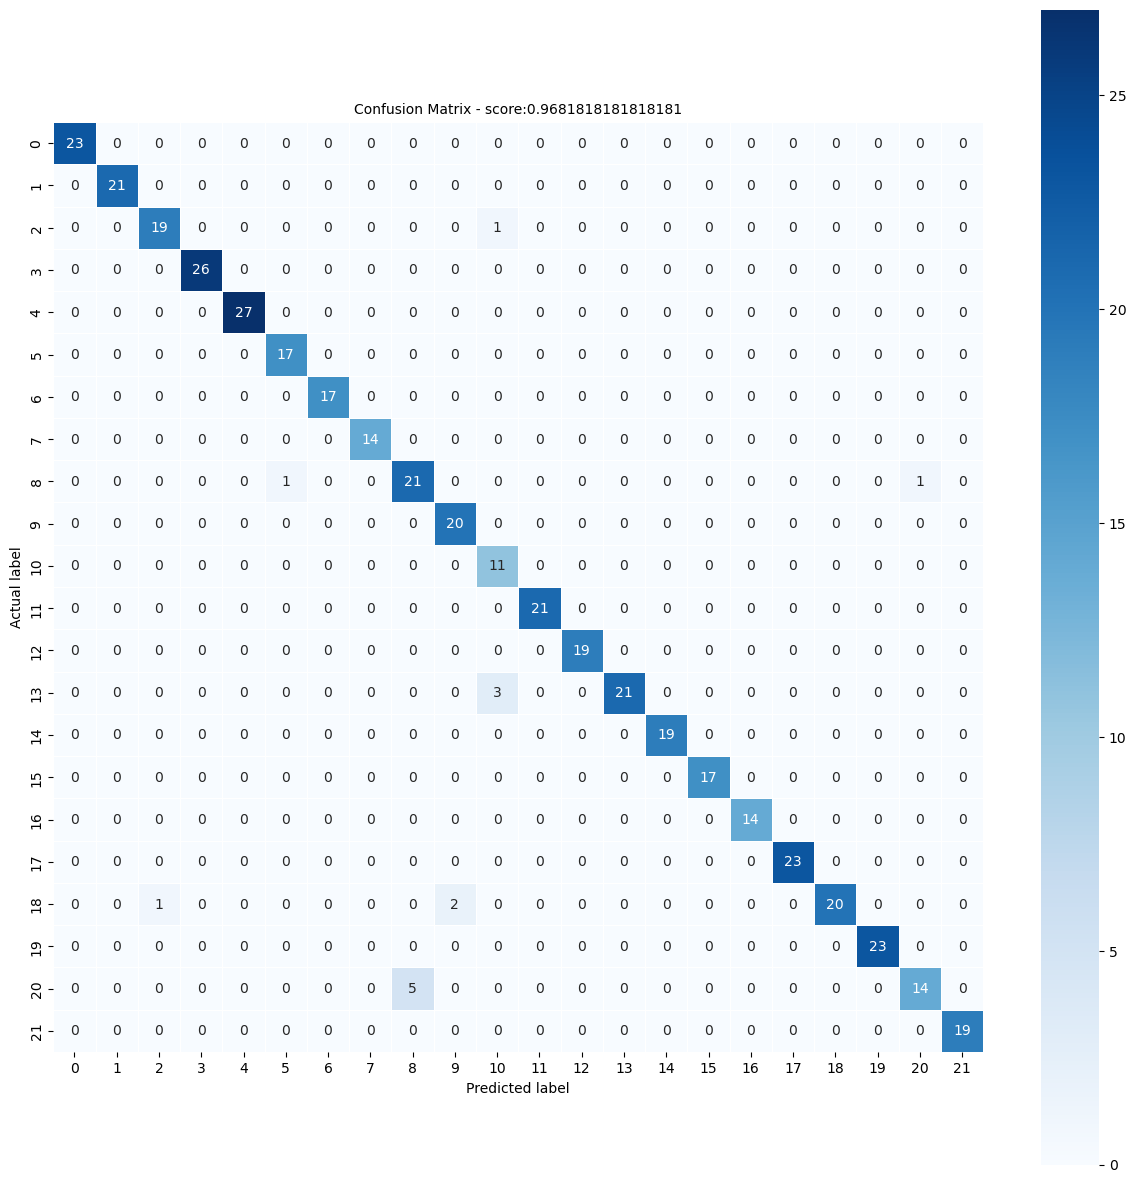

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.81      0.91      0.86        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

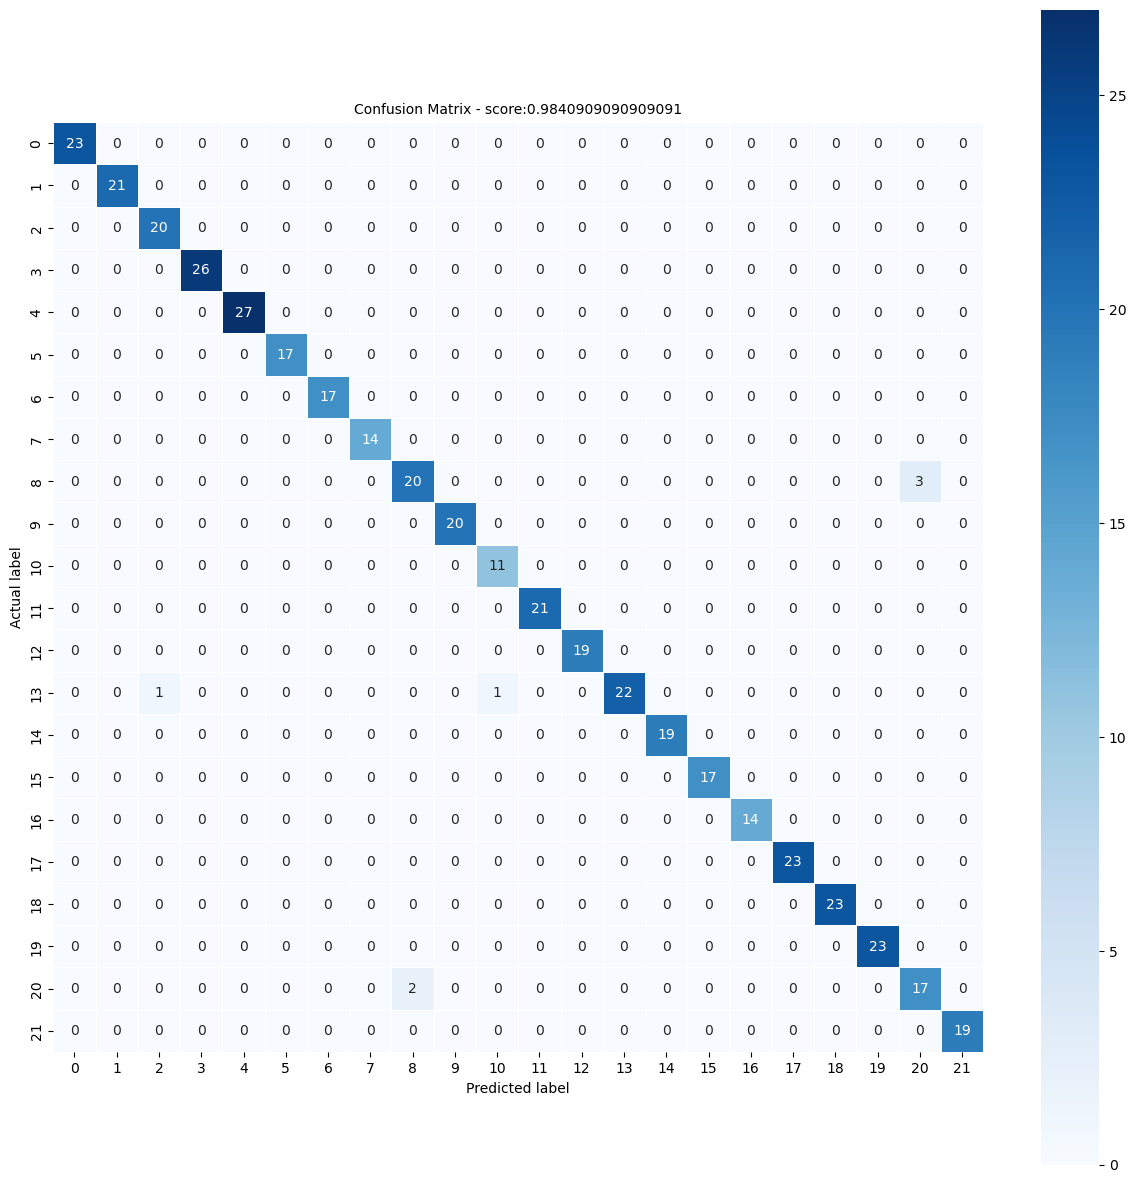

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

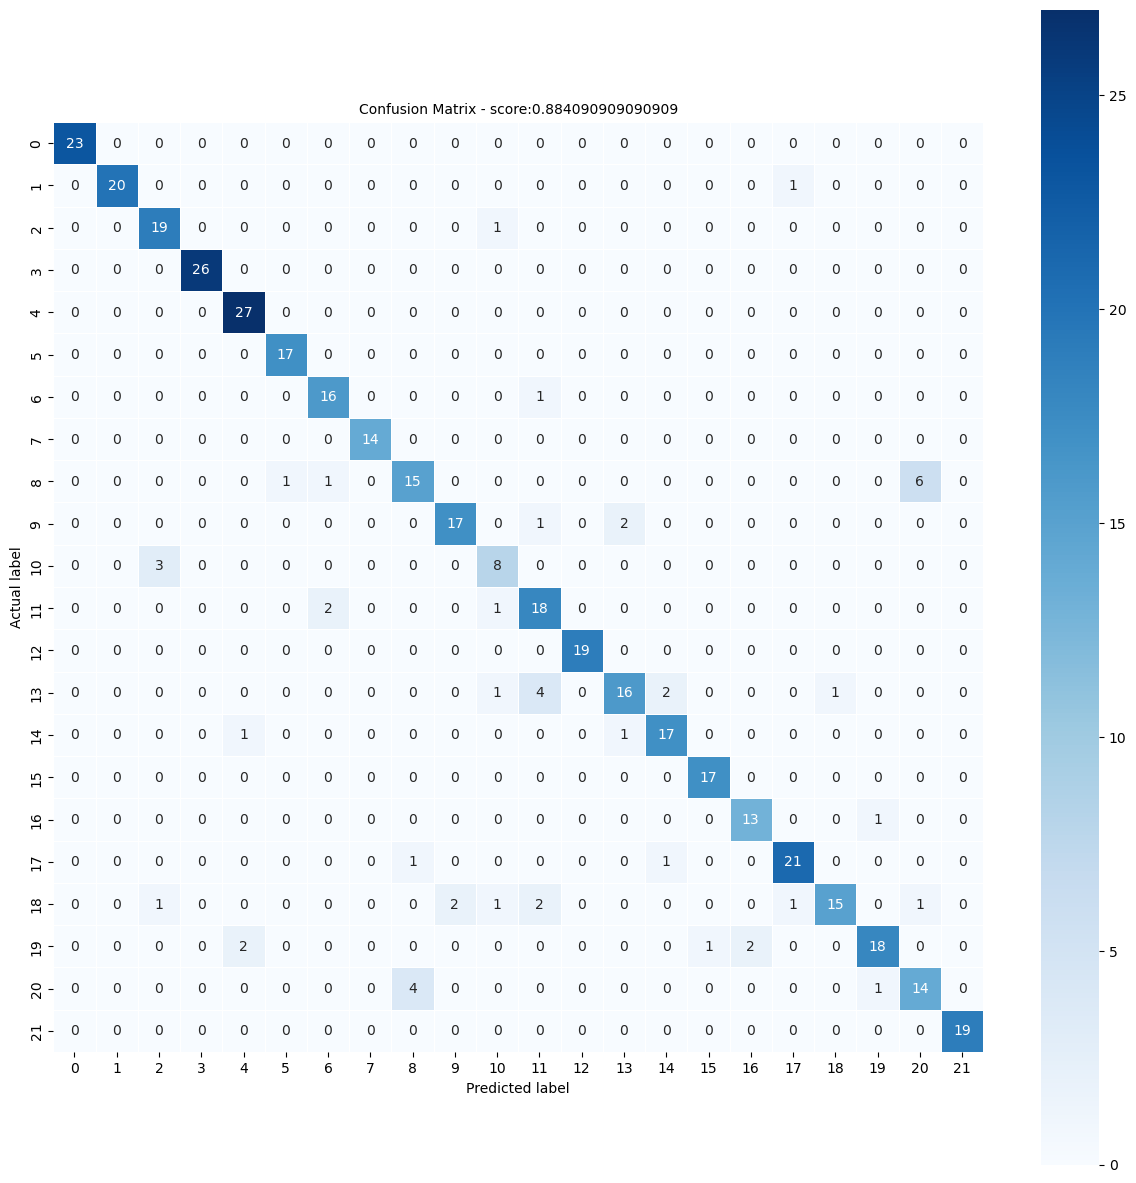

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.98        21
           2       0.83      0.95      0.88        20
           3       1.00      1.00      1.00        26
           4       0.90      1.00      0.95        27
           5       0.94      1.00      0.97        17
           6       0.84      0.94      0.89        17
           7       1.00      1.00      1.00        14
           8       0.75      0.65      0.70        23
           9       0.89      0.85      0.87        20
          10       0.67      0.73      0.70        11
          11       0.69      0.86      0.77        21
          12       1.00      1.00      1.00        19
          13       0.84      0.67      0.74        24
          14       0.85      0.89      0.87        19
          15       0.94      1.00      0.97        17
          16       0.87      0.93      0.90        14
   

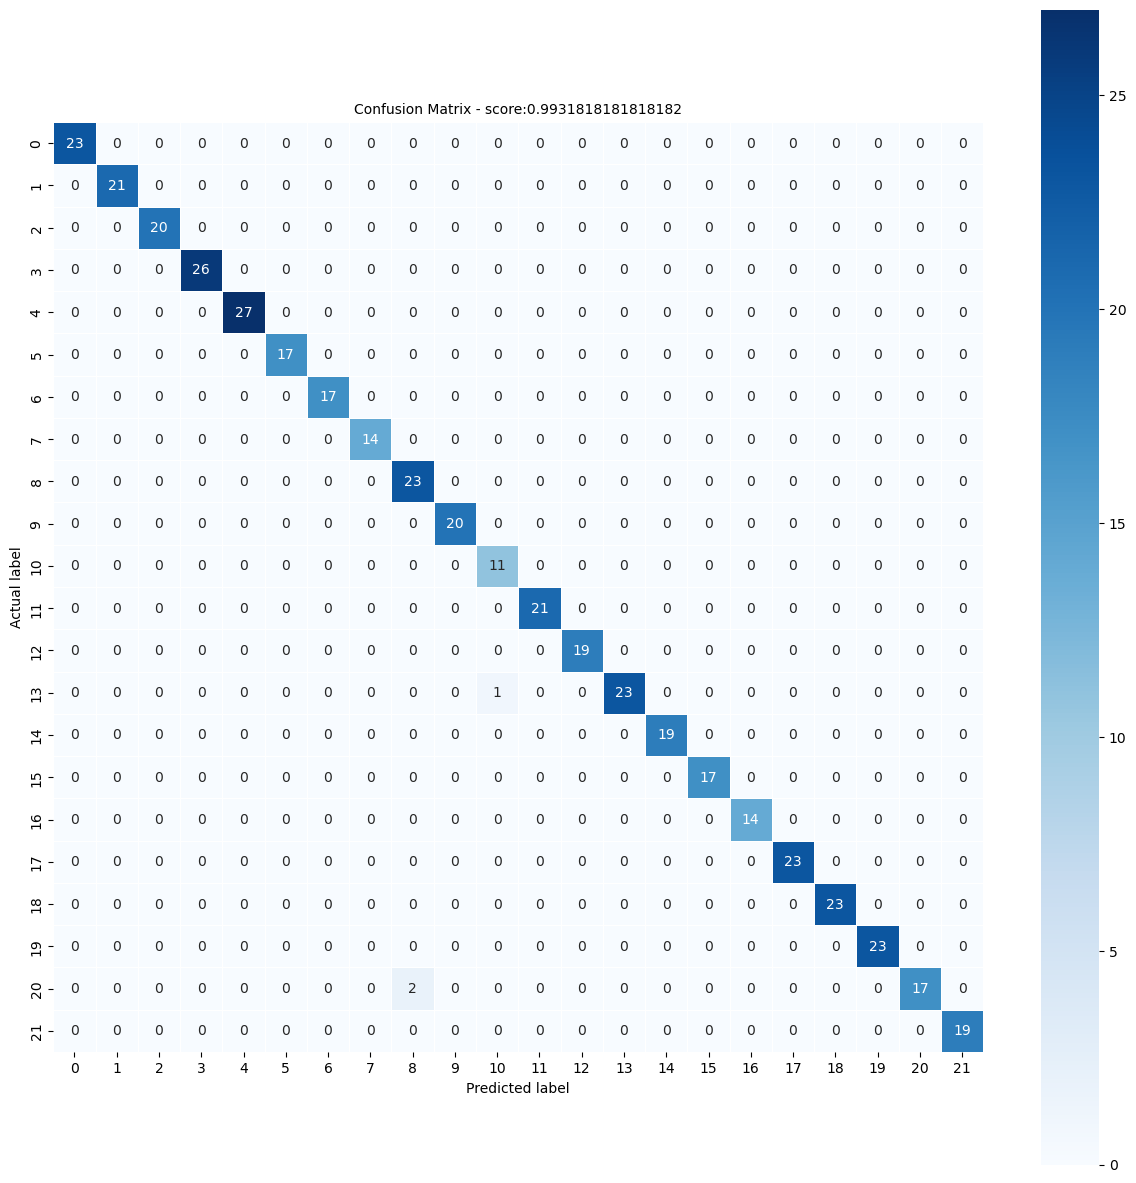

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

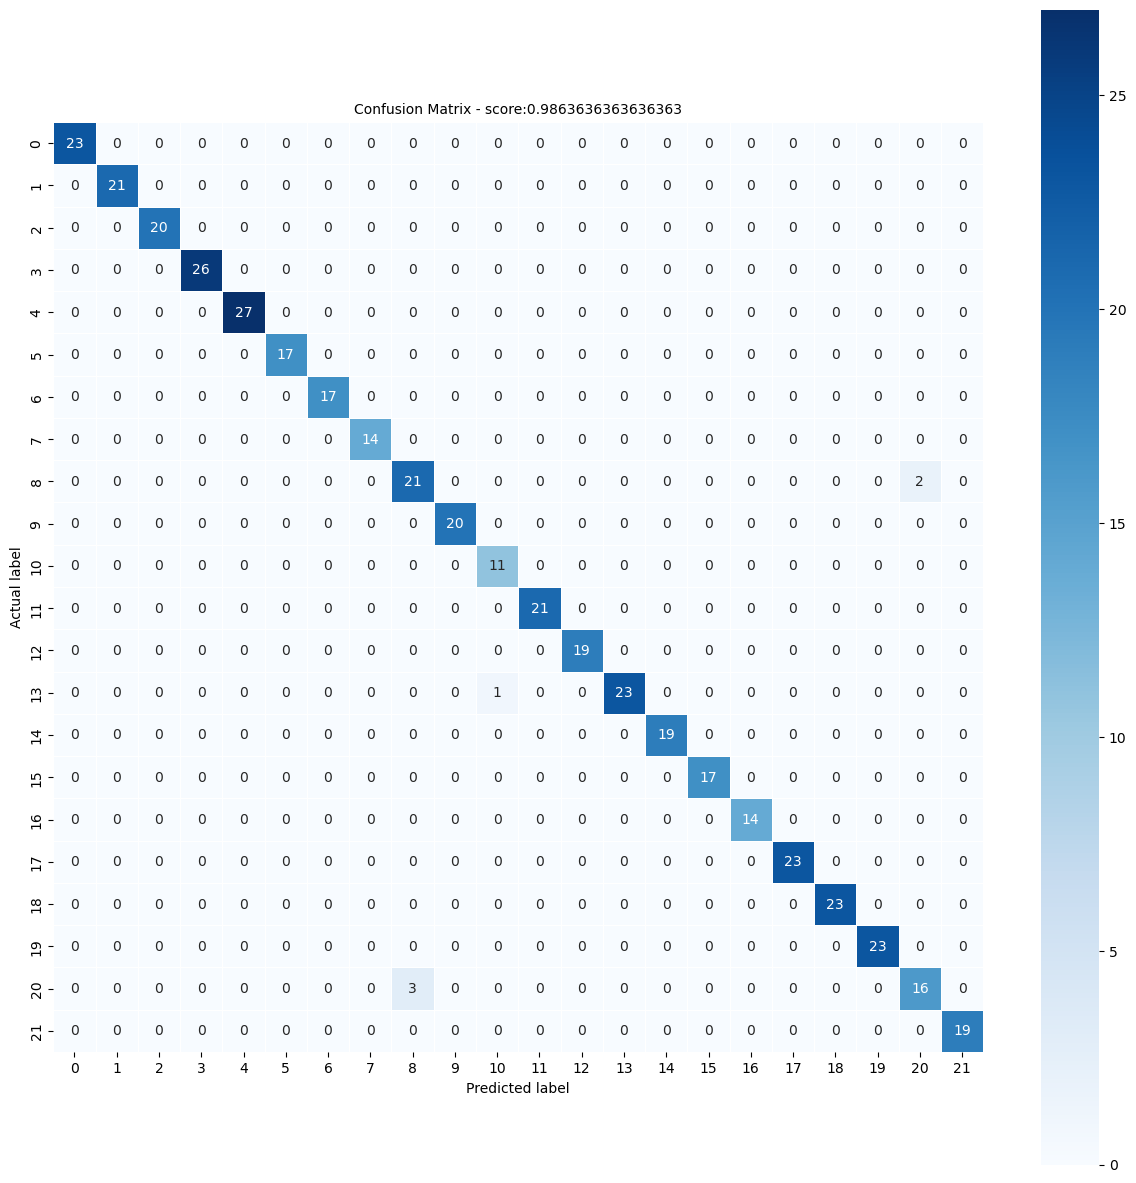

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      0.91      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

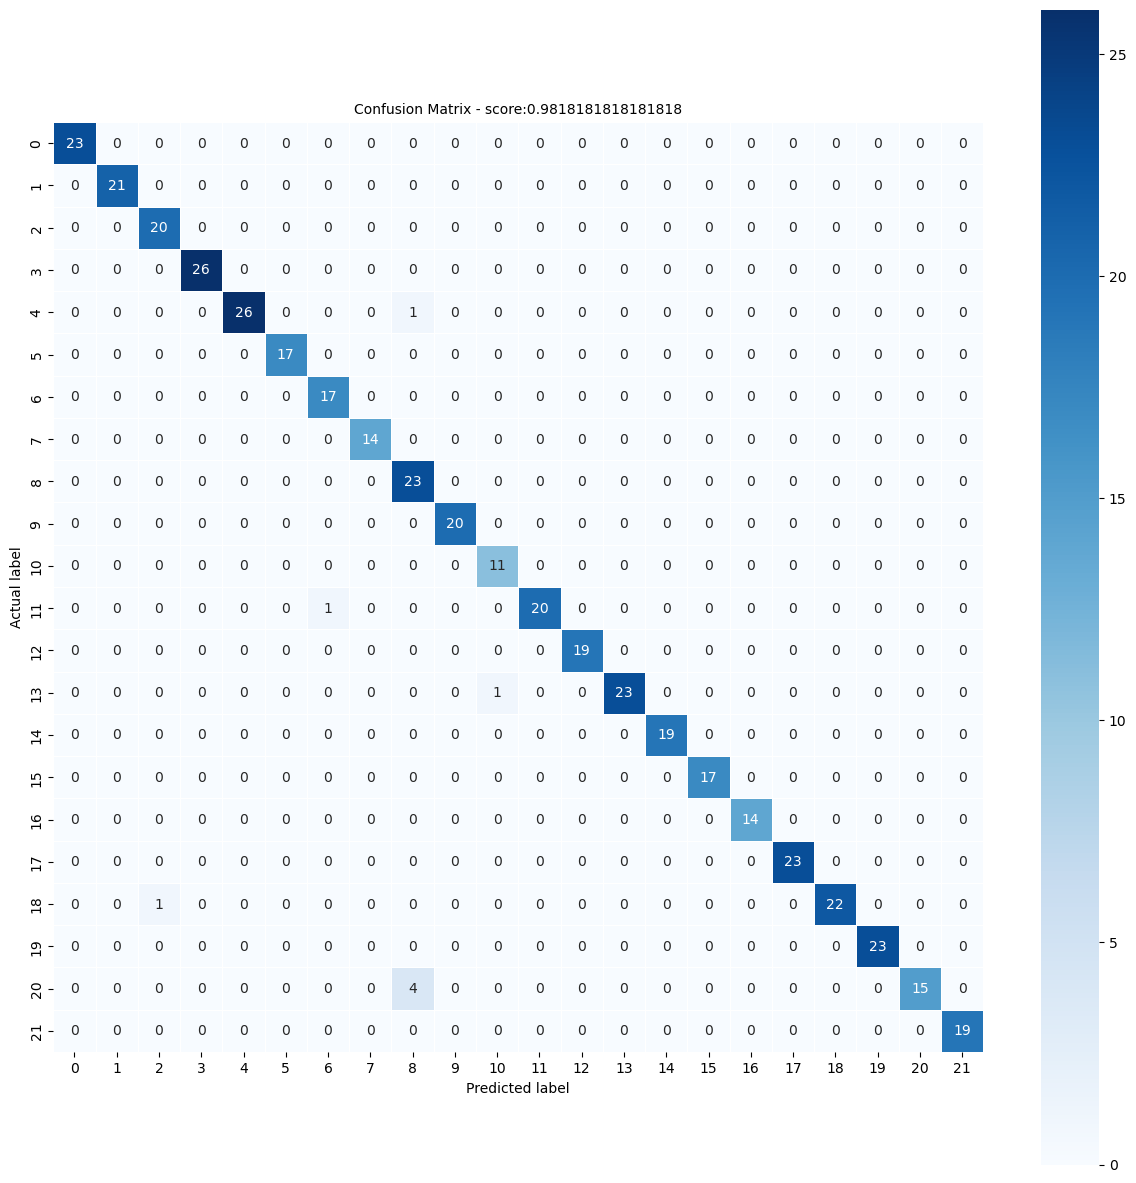

classification_report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

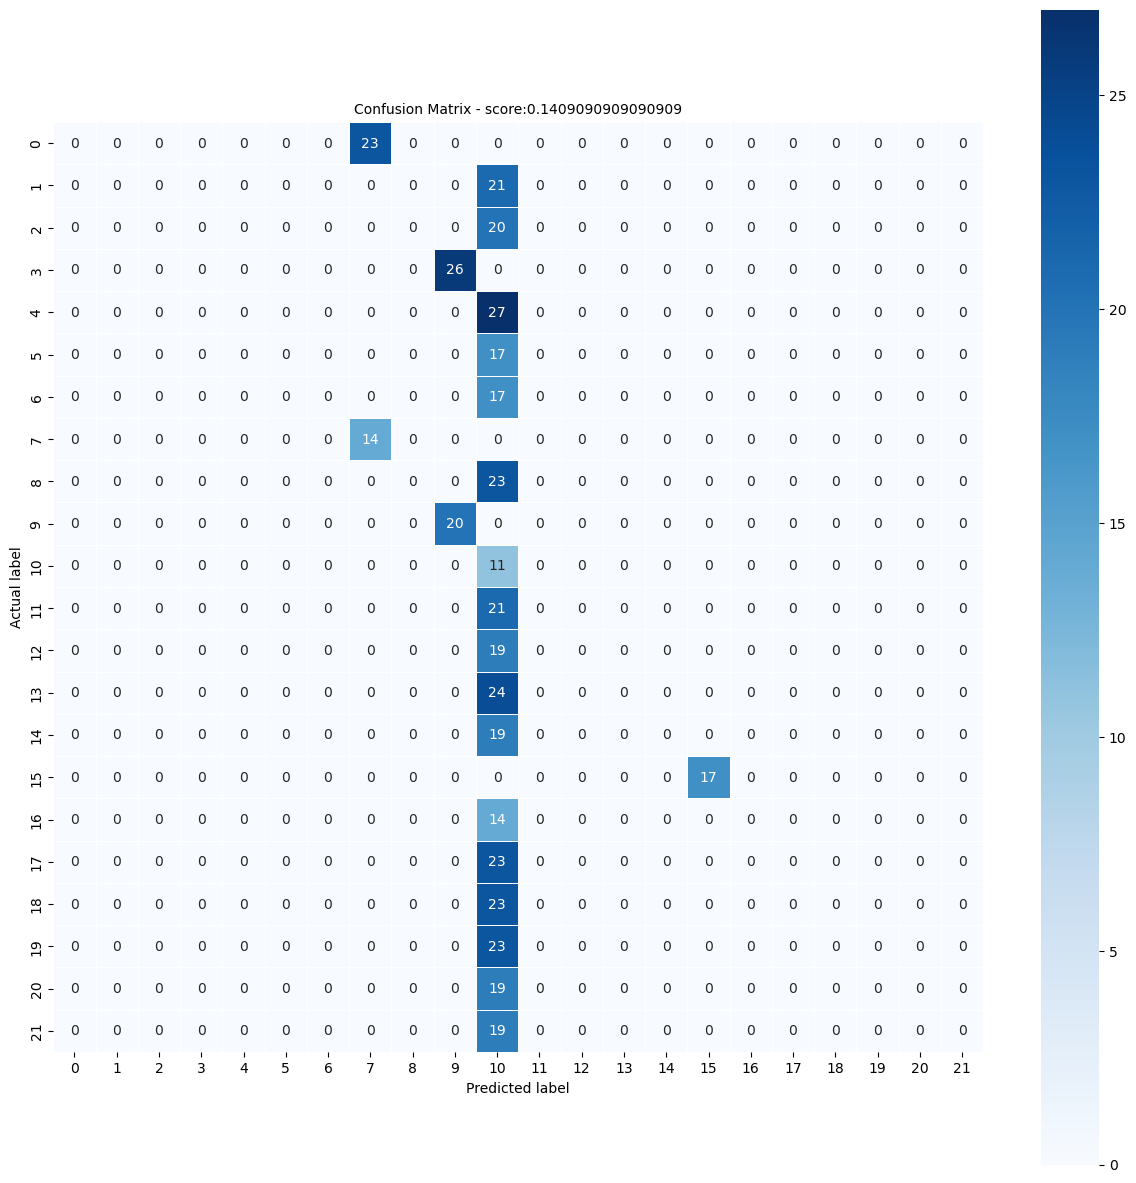

classification_report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        17
           7       0.38      1.00      0.55        14
           8       0.00      0.00      0.00        23
           9       0.43      1.00      0.61        20
          10       0.03      1.00      0.06        11
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        24
          14       0.00      0.00      0.00        19
          15       1.00      1.00      1.00        17
          16       0.00      0.00      0.00        14
   

In [154]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} mode with accuracy: {score:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,15))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 10);
    plt.show()
    print("classification_report:\n")
    print(classification_report(y_test, y_pred))
    print("====="*25)

## Selecting the best model

In [155]:
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
y_pred = model_gnb.predict(X_test)

print("Accuracy score:", accuracy_score(y_test,y_pred))
print("confusion matrix \n: ", confusion_matrix(y_test,y_pred))
print("classification report \n: ", classification_report(y_test, y_pred))

Accuracy score: 0.9954545454545455
confusion matrix 
:  [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0 

## Saving Model, Encoder, Scaler for production

In [156]:
import pickle

pickle.dump(encoder, open("models/encoder.pkl",'wb'))
pickle.dump(model_gnb,open("models/model_gnb.pkl",'wb'))
pickle.dump(scaler,open("models/scaler.pkl",'wb'))

## Prediction on new test data

In [157]:
import numpy as np

# Load encoder, scaler, and model
encoder = pickle.load(open("models/encoder.pkl", 'rb'))
scaler = pickle.load(open("models/scaler.pkl", 'rb'))
model_gbc = pickle.load(open("models/model_gnb.pkl", 'rb'))

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create DataFrame from input values
    input_df = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                            columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    
    # Scale the data
    input_scaled = scaler.transform(input_df)
    
    # Predict and decode
    prediction_encoded = model_gbc.predict(input_scaled)
    prediction = encoder.inverse_transform(prediction_encoded)
    
    return prediction[0]

result = predict_crop(90, 40, 40, 25.0, 80.0, 6.5, 100.0)
print("Recommended Crop:", result)

Recommended Crop: rice


In [158]:
# Sample input values (at least 10 different sets)
# The test_inputs list contains tuples, where each tuple has 7 values representing:
test_inputs = [
    (90, 40, 40, 25.0, 80.0, 6.5, 100.0),
    (60, 30, 20, 22.5, 75.0, 6.0, 120.0),
    (80, 60, 50, 27.0, 82.0, 6.8, 95.0),
    (100, 45, 45, 30.0, 85.0, 7.0, 110.0),
    (70, 55, 65, 28.0, 78.0, 6.4, 105.0),
    (65, 40, 50, 26.0, 70.0, 5.8, 90.0),
    (55, 20, 25, 24.0, 72.0, 6.3, 130.0),
    (85, 65, 60, 29.0, 90.0, 6.7, 115.0),
    (95, 50, 70, 31.0, 88.0, 6.9, 102.0),
    (50, 25, 30, 23.0, 68.0, 6.1, 85.0)
]

# Loop through inputs and print predictions
# enumerate(test_inputs, 1): Creates numbered iterations starting from 1
# *values: Unpacks the tuple to pass individual arguments to predict_crop function

for i, values in enumerate(test_inputs, 1):
    result = predict_crop(*values)
    print(f"{i}. Input: {values} -> Recommended Crop: {result}")

1. Input: (90, 40, 40, 25.0, 80.0, 6.5, 100.0) -> Recommended Crop: rice
2. Input: (60, 30, 20, 22.5, 75.0, 6.0, 120.0) -> Recommended Crop: maize
3. Input: (80, 60, 50, 27.0, 82.0, 6.8, 95.0) -> Recommended Crop: banana
4. Input: (100, 45, 45, 30.0, 85.0, 7.0, 110.0) -> Recommended Crop: rice
5. Input: (70, 55, 65, 28.0, 78.0, 6.4, 105.0) -> Recommended Crop: banana
6. Input: (65, 40, 50, 26.0, 70.0, 5.8, 90.0) -> Recommended Crop: jute
7. Input: (55, 20, 25, 24.0, 72.0, 6.3, 130.0) -> Recommended Crop: coffee
8. Input: (85, 65, 60, 29.0, 90.0, 6.7, 115.0) -> Recommended Crop: papaya
9. Input: (95, 50, 70, 31.0, 88.0, 6.9, 102.0) -> Recommended Crop: papaya
10. Input: (50, 25, 30, 23.0, 68.0, 6.1, 85.0) -> Recommended Crop: maize
